In [1]:
import tensorflow as tf

In [6]:
import numpy as np

In [7]:
v = tf.Variable(1.0)

In [8]:
v.assign(2.0)

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=2.0>

In [9]:
v

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=2.0>

In [10]:
v.assign(tf.square(v))

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=4.0>

In [11]:
class Model:
    
    def __init__(self):
        self.w = tf.Variable(np.random.normal())
        self.b = tf.Variable(np.random.normal())
    
    def __call__(self, x):
        return self.w * x + self.b

In [12]:
model = Model()

In [13]:
def loss(output, label):
    return tf.reduce_mean(tf.square(output - label))

In [14]:
W = 3.0
b = 2.0
num = 1000

In [15]:
inputs = tf.random.normal([num])
noise = tf.random.normal([num])
outputs = inputs * W + b + noise

In [16]:
import matplotlib.pyplot as plt

In [17]:
%matplotlib inline

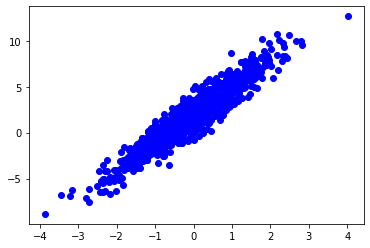

In [18]:
plt.scatter(inputs, outputs, c = "b")

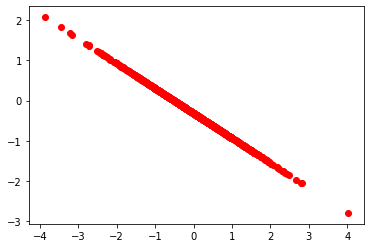

In [19]:
plt.scatter(inputs, model(inputs), c = "r")

In [20]:
print("Current Loss: {}".format(loss(model(inputs), outputs)))

Current Loss: 19.32319450378418


In [21]:
def train(model, inputs, outputs, learning_rate):
    with tf.GradientTape() as t:
        current_loss = loss(model(inputs), outputs)
    d_w, d_b = t.gradient(current_loss, [model.w, model.b])
    model.w.assign_sub(learning_rate * d_w)
    model.b.assign_sub(learning_rate * d_b)

In [38]:
model = Model()

In [39]:
model.w

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.59229887>

In [40]:
ws, bs = [], []

In [41]:
for _ in range(1000):
    ws.append(model.w.numpy())
    bs.append(model.b.numpy())
    current_loss = loss(model(inputs), outputs)
    train(model, inputs, outputs, 0.01)
    print("Epoch {}: W:{}, b:{}, loss:{}".format(_, ws[-1], bs[-1], current_loss))

Epoch 0: W:0.5922988653182983, b:2.11185359954834, loss:7.140978813171387
Epoch 1: W:0.642774224281311, b:2.107283592224121, loss:6.886829853057861
Epoch 2: W:0.6921858191490173, b:2.102849006652832, loss:6.643314361572266
Epoch 3: W:0.7405560612678528, b:2.098546266555786, loss:6.4099884033203125
Epoch 4: W:0.7879070043563843, b:2.094371795654297, loss:6.186422824859619
Epoch 5: W:0.834260106086731, b:2.0903220176696777, loss:5.972210884094238
Epoch 6: W:0.8796364068984985, b:2.0863938331604004, loss:5.766959190368652
Epoch 7: W:0.9240565299987793, b:2.0825839042663574, loss:5.570293426513672
Epoch 8: W:0.9675406813621521, b:2.0788888931274414, loss:5.381854057312012
Epoch 9: W:1.0101085901260376, b:2.075305700302124, loss:5.201295852661133
Epoch 10: W:1.0517796277999878, b:2.071831226348877, loss:5.028288841247559
Epoch 11: W:1.0925726890563965, b:2.068462610244751, loss:4.8625168800354
Epoch 12: W:1.132506251335144, b:2.065196990966797, loss:4.703677654266357
Epoch 13: W:1.171598553

Epoch 118: W:2.7950384616851807, b:1.9775751829147339, loss:1.0988256931304932
Epoch 119: W:2.799147129058838, b:1.9776135683059692, loss:1.097154974937439
Epoch 120: W:2.8031697273254395, b:1.9776548147201538, loss:1.0955538749694824
Epoch 121: W:2.80710768699646, b:1.977698802947998, loss:1.0940191745758057
Epoch 122: W:2.8109631538391113, b:1.9777452945709229, loss:1.0925480127334595
Epoch 123: W:2.814737558364868, b:1.9777942895889282, loss:1.0911380052566528
Epoch 124: W:2.8184328079223633, b:1.977845549583435, loss:1.0897866487503052
Epoch 125: W:2.8220505714416504, b:1.9778989553451538, loss:1.0884913206100464
Epoch 126: W:2.825592517852783, b:1.9779545068740845, loss:1.0872496366500854
Epoch 127: W:2.8290600776672363, b:1.9780120849609375, loss:1.0860595703125
Epoch 128: W:2.8324549198150635, b:1.9780714511871338, loss:1.0849188566207886
Epoch 129: W:2.8357784748077393, b:1.9781326055526733, loss:1.0838253498077393
Epoch 130: W:2.8390321731567383, b:1.9781954288482666, loss:1.0

Epoch 262: W:2.981778621673584, b:1.9862021207809448, loss:1.058609127998352
Epoch 263: W:2.9819741249084473, b:1.9862310886383057, loss:1.0586051940917969
Epoch 264: W:2.9821653366088867, b:1.9862595796585083, loss:1.0586014986038208
Epoch 265: W:2.9823527336120605, b:1.9862877130508423, loss:1.0585979223251343
Epoch 266: W:2.9825360774993896, b:1.986315369606018, loss:1.0585944652557373
Epoch 267: W:2.982715606689453, b:1.9863426685333252, loss:1.058591365814209
Epoch 268: W:2.98289155960083, b:1.9863696098327637, loss:1.0585881471633911
Epoch 269: W:2.9830636978149414, b:1.9863961935043335, loss:1.0585851669311523
Epoch 270: W:2.983232259750366, b:1.9864223003387451, loss:1.0585824251174927
Epoch 271: W:2.9833972454071045, b:1.986448049545288, loss:1.058579444885254
Epoch 272: W:2.9835588932037354, b:1.9864734411239624, loss:1.0585769414901733
Epoch 273: W:2.983717203140259, b:1.986498475074768, loss:1.0585741996765137
Epoch 274: W:2.983872175216675, b:1.986523151397705, loss:1.0585

Epoch 414: W:2.990774393081665, b:1.987916350364685, loss:1.0585148334503174
Epoch 415: W:2.9907824993133545, b:1.9879188537597656, loss:1.0585148334503174
Epoch 416: W:2.990790367126465, b:1.9879213571548462, loss:1.0585148334503174
Epoch 417: W:2.990797996520996, b:1.9879237413406372, loss:1.0585148334503174
Epoch 418: W:2.9908056259155273, b:1.9879261255264282, loss:1.0585148334503174
Epoch 419: W:2.9908130168914795, b:1.9879283905029297, loss:1.0585148334503174
Epoch 420: W:2.9908201694488525, b:1.9879306554794312, loss:1.0585148334503174
Epoch 421: W:2.9908273220062256, b:1.9879329204559326, loss:1.0585147142410278
Epoch 422: W:2.9908342361450195, b:1.987935185432434, loss:1.0585148334503174
Epoch 423: W:2.9908409118652344, b:1.987937331199646, loss:1.0585148334503174
Epoch 424: W:2.990847587585449, b:1.987939476966858, loss:1.0585148334503174
Epoch 425: W:2.990854024887085, b:1.9879416227340698, loss:1.0585148334503174
Epoch 426: W:2.9908604621887207, b:1.9879436492919922, loss:1

Epoch 580: W:2.9911489486694336, b:1.9880505800247192, loss:1.0585147142410278
Epoch 581: W:2.9911491870880127, b:1.9880506992340088, loss:1.0585147142410278
Epoch 582: W:2.991149425506592, b:1.9880508184432983, loss:1.0585147142410278
Epoch 583: W:2.991149663925171, b:1.988050937652588, loss:1.0585147142410278
Epoch 584: W:2.99114990234375, b:1.9880510568618774, loss:1.0585147142410278
Epoch 585: W:2.991150140762329, b:1.988051176071167, loss:1.0585147142410278
Epoch 586: W:2.991150379180908, b:1.9880512952804565, loss:1.0585147142410278
Epoch 587: W:2.9911506175994873, b:1.988051414489746, loss:1.0585145950317383
Epoch 588: W:2.9911508560180664, b:1.9880515336990356, loss:1.0585147142410278
Epoch 589: W:2.9911510944366455, b:1.9880516529083252, loss:1.0585147142410278
Epoch 590: W:2.9911513328552246, b:1.9880517721176147, loss:1.0585147142410278
Epoch 591: W:2.9911515712738037, b:1.9880518913269043, loss:1.0585147142410278
Epoch 592: W:2.991151809692383, b:1.9880520105361938, loss:1.

Epoch 747: W:2.9911561012268066, b:1.988054633140564, loss:1.0585147142410278
Epoch 748: W:2.9911561012268066, b:1.988054633140564, loss:1.0585147142410278
Epoch 749: W:2.9911561012268066, b:1.988054633140564, loss:1.0585147142410278
Epoch 750: W:2.9911561012268066, b:1.988054633140564, loss:1.0585147142410278
Epoch 751: W:2.9911561012268066, b:1.988054633140564, loss:1.0585147142410278
Epoch 752: W:2.9911561012268066, b:1.988054633140564, loss:1.0585147142410278
Epoch 753: W:2.9911561012268066, b:1.988054633140564, loss:1.0585147142410278
Epoch 754: W:2.9911561012268066, b:1.988054633140564, loss:1.0585147142410278
Epoch 755: W:2.9911561012268066, b:1.988054633140564, loss:1.0585147142410278
Epoch 756: W:2.9911561012268066, b:1.988054633140564, loss:1.0585147142410278
Epoch 757: W:2.9911561012268066, b:1.988054633140564, loss:1.0585147142410278
Epoch 758: W:2.9911561012268066, b:1.988054633140564, loss:1.0585147142410278
Epoch 759: W:2.9911561012268066, b:1.988054633140564, loss:1.058

Epoch 906: W:2.9911561012268066, b:1.988054633140564, loss:1.0585147142410278
Epoch 907: W:2.9911561012268066, b:1.988054633140564, loss:1.0585147142410278
Epoch 908: W:2.9911561012268066, b:1.988054633140564, loss:1.0585147142410278
Epoch 909: W:2.9911561012268066, b:1.988054633140564, loss:1.0585147142410278
Epoch 910: W:2.9911561012268066, b:1.988054633140564, loss:1.0585147142410278
Epoch 911: W:2.9911561012268066, b:1.988054633140564, loss:1.0585147142410278
Epoch 912: W:2.9911561012268066, b:1.988054633140564, loss:1.0585147142410278
Epoch 913: W:2.9911561012268066, b:1.988054633140564, loss:1.0585147142410278
Epoch 914: W:2.9911561012268066, b:1.988054633140564, loss:1.0585147142410278
Epoch 915: W:2.9911561012268066, b:1.988054633140564, loss:1.0585147142410278
Epoch 916: W:2.9911561012268066, b:1.988054633140564, loss:1.0585147142410278
Epoch 917: W:2.9911561012268066, b:1.988054633140564, loss:1.0585147142410278
Epoch 918: W:2.9911561012268066, b:1.988054633140564, loss:1.058

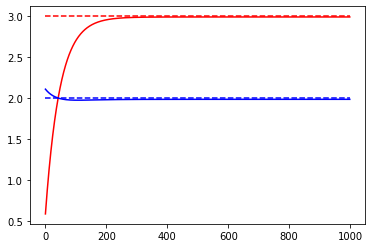

In [43]:
plt.plot(range(1000), ws, "r")
plt.plot(range(1000), bs, "b")
plt.plot(range(1000), [W] * 1000, "r--")
plt.plot(range(1000), [b] * 1000, "b--")